## Chapter 2. supervised learning

- 지도학습, 교사학습
- 가장 널리, 가장 성공적으로 사용되는 머신러닝 방법
- 입력(x)과 출력(y) 샘플이 쌍으로 준비되어 있어야 합니다.
- 출력(y) 샘플을 만들기 위해서 사람의 노력이 필요하다.

### 2.1 분류와 회귀

- 분류는 여러 클래스 레이블 중 하나를 예측 (A,B,C)
- 회귀는 연속적인 숫자 예측 (내일 집값 1% 상승)

### 2.2 일반화, 과대적합, 과소적합

- 처음보는 데이터에 대해서도 잘 예측하면 모델이 훈련세트에서 테스트 세트로 일반화되었다. generalization(최적,목표)
- 학습할때 잘됐는데 테스트셋에는 예측이 잘 안된다. : 과대적합(overfitting) 되었다.
- 학습도 잘 안되고, 테스트 셋도 잘 안된다 : 과소적합(underfitting) 되었다.

### 2.3.1 예제에 사용할 데이터 셋

In [11]:
#p58
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import sklearn

In [12]:
#sklearn.datasets.make_blobs()

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, '두 번째 특성')

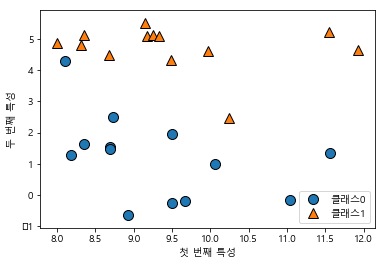

In [14]:
X, y = mglearn.datasets.make_forge()
plt.rc('font', family='Malgun Gothic')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.legend(['클래스0','클래스1'])
plt.xlabel(('첫 번째 특성'))
plt.ylabel(('두 번째 특성'))

Text(0, 0.5, '타겟')

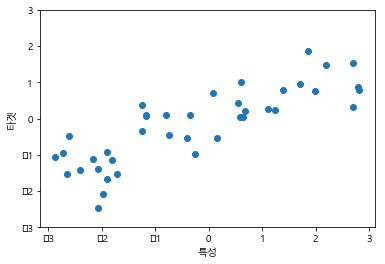

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타겟')

In [21]:
#60
from sklearn.datasets import load_breast_cancer  #소문자로 시작하면 함수
cancer = load_breast_cancer()  #병원에서 만든 유방암 환자들의 데이터
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [25]:
cancer.data.shape

(569, 30)

In [26]:
cancer.target_names  # 목표 : 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 2.3.2 k-최근접 이웃(k-Nearest Neighbors)

- 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다.

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


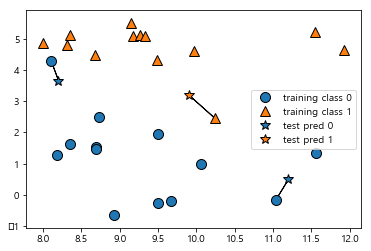

In [33]:
#63
mglearn.plots.plot_knn_classification(n_neighbors=1)

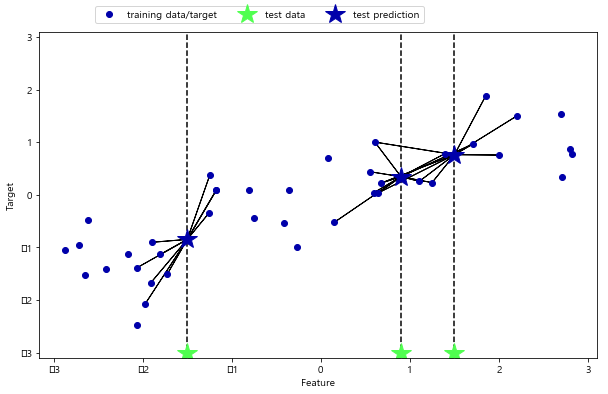

In [35]:
#p69 classifer분류 > regression 예측
mglearn.plots.plot_knn_regression(n_neighbors=10)

In [36]:
# 유방암 분류 KNN Classifier / 회귀 KNN Regressor

In [37]:
import sklearn.datasets as datasets

In [38]:
cancer = datasets.load_breast_cancer()

In [40]:
cancer.data.shape, cancer.target_names

((569, 30), array(['malignant', 'benign'], dtype='<U9'))

In [41]:
cancer.target_names = ['악성','양성']
cancer.target_names

['악성', '양성']

In [42]:
# 모델이 믿을 수 있는지 테스트 해봐야 하므로 데이터를 75%는 학습용, 25%는 테스트용
# KNN Classifier 로 분류, 학습용 데이터로 피팅, 테스트용 데이터로 성능 측정

In [48]:
from sklearn.model_selection import train_test_split
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x,y)
x.shape, x_train.shape, x_test.shape

((569, 30), (426, 30), (143, 30))

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
print('  학습셋', knn.score(x_train, y_train))
print('테스트셋', knn.score(x_test,y_test))

  학습셋 0.9483568075117371
테스트셋 0.9230769230769231
